Data Exploration and Preprocessing

In [65]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix
from tabulate import tabulate


In [2]:
train = pd.read_csv("train70_reduced.csv")
train.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,0.998867,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,0.000067,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000010,0.000058,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,0.000227,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,0.000236,16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231646 entries, 0 to 231645
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tcp.flags                   231646 non-null  object 
 1   tcp.time_delta              231646 non-null  float64
 2   tcp.len                     231646 non-null  int64  
 3   mqtt.conack.flags           231646 non-null  object 
 4   mqtt.conack.flags.reserved  231646 non-null  float64
 5   mqtt.conack.flags.sp        231646 non-null  float64
 6   mqtt.conack.val             231646 non-null  float64
 7   mqtt.conflag.cleansess      231646 non-null  float64
 8   mqtt.conflag.passwd         231646 non-null  float64
 9   mqtt.conflag.qos            231646 non-null  float64
 10  mqtt.conflag.reserved       231646 non-null  float64
 11  mqtt.conflag.retain         231646 non-null  float64
 12  mqtt.conflag.uname          231646 non-null  float64
 13  mqtt.conflag.w

In [4]:
train.shape

(231646, 34)

In [5]:
train["target"].unique()

array(['legitimate', 'dos', 'malformed', 'bruteforce', 'slowite', 'flood'],
      dtype=object)

In [6]:
train = train[(train["target"] == "legitimate") | (train["target"] == "dos")]
train["target"].unique()

array(['legitimate', 'dos'], dtype=object)

In [7]:
train.isna().any()

tcp.flags                     False
tcp.time_delta                False
tcp.len                       False
mqtt.conack.flags             False
mqtt.conack.flags.reserved    False
mqtt.conack.flags.sp          False
mqtt.conack.val               False
mqtt.conflag.cleansess        False
mqtt.conflag.passwd           False
mqtt.conflag.qos              False
mqtt.conflag.reserved         False
mqtt.conflag.retain           False
mqtt.conflag.uname            False
mqtt.conflag.willflag         False
mqtt.conflags                 False
mqtt.dupflag                  False
mqtt.hdrflags                 False
mqtt.kalive                   False
mqtt.len                      False
mqtt.msg                      False
mqtt.msgid                    False
mqtt.msgtype                  False
mqtt.proto_len                False
mqtt.protoname                False
mqtt.qos                      False
mqtt.retain                   False
mqtt.sub.qos                  False
mqtt.suback.qos             

In [8]:
label_encoder = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0, 1))

In [9]:
numerical_features = train.columns[train.dtypes != 'object']
if len(numerical_features) > 0:
    train[numerical_features] = scaler.fit_transform(train[numerical_features])
train

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000018,1.664754e-02,0.006849,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
1,0x00000010,1.116650e-06,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000010,9.666525e-07,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
3,0x00000018,3.783278e-06,0.006849,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000018,3.933276e-06,0.010959,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231641,0x00000010,4.999927e-08,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
231642,0x00000010,4.999927e-08,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
231643,0x00000010,1.666642e-07,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
231644,0x00000018,1.666642e-08,0.008219,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [10]:
train['tcp.flags'] = label_encoder.fit_transform(train['tcp.flags'])
train['tcp.flags'].unique()

array([4, 1, 0, 3, 2])

In [11]:
train['mqtt.conack.flags'] = label_encoder.fit_transform(train['mqtt.conack.flags'])
train['mqtt.conack.flags'].unique()

array([0, 1])

In [12]:
train['mqtt.conflags'] = label_encoder.fit_transform(train['mqtt.conflags'])
train['mqtt.conflags'].unique()

array([0, 1])

In [13]:
train['mqtt.hdrflags'] = label_encoder.fit_transform(train['mqtt.hdrflags'])
train['mqtt.hdrflags'].unique()

array([3, 4, 6, 0, 5, 8, 7, 2, 1, 9])

In [14]:
label_encoder.fit(["legitimate", "dos"])
mapping = {"legitimate": 0, "dos": 1}
train["target"] = [mapping[label] for label in train["target"].to_list()]
train["target"].unique()

array([0, 1], dtype=int64)

In [15]:
train = train.drop(columns=["mqtt.msg", "mqtt.protoname"])
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206980 entries, 0 to 231645
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tcp.flags                   206980 non-null  int32  
 1   tcp.time_delta              206980 non-null  float64
 2   tcp.len                     206980 non-null  float64
 3   mqtt.conack.flags           206980 non-null  int32  
 4   mqtt.conack.flags.reserved  206980 non-null  float64
 5   mqtt.conack.flags.sp        206980 non-null  float64
 6   mqtt.conack.val             206980 non-null  float64
 7   mqtt.conflag.cleansess      206980 non-null  float64
 8   mqtt.conflag.passwd         206980 non-null  float64
 9   mqtt.conflag.qos            206980 non-null  float64
 10  mqtt.conflag.reserved       206980 non-null  float64
 11  mqtt.conflag.retain         206980 non-null  float64
 12  mqtt.conflag.uname          206980 non-null  float64
 13  mqtt.conflag.willfl

In [16]:
test = pd.read_csv("test30_reduced.csv")
test.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000014,0.029854,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
1,0x00000018,0.000001,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000018,0.999820,13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
3,0x00000012,0.007949,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malformed
4,0x00000010,0.000121,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99290 entries, 0 to 99289
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tcp.flags                   99290 non-null  object 
 1   tcp.time_delta              99290 non-null  float64
 2   tcp.len                     99290 non-null  int64  
 3   mqtt.conack.flags           99290 non-null  object 
 4   mqtt.conack.flags.reserved  99290 non-null  float64
 5   mqtt.conack.flags.sp        99290 non-null  float64
 6   mqtt.conack.val             99290 non-null  float64
 7   mqtt.conflag.cleansess      99290 non-null  float64
 8   mqtt.conflag.passwd         99290 non-null  float64
 9   mqtt.conflag.qos            99290 non-null  float64
 10  mqtt.conflag.reserved       99290 non-null  float64
 11  mqtt.conflag.retain         99290 non-null  float64
 12  mqtt.conflag.uname          99290 non-null  float64
 13  mqtt.conflag.willflag       992

In [18]:
test = test[(test["target"] == "legitimate") | (test["target"] == "dos")]
test["target"].unique()

array(['dos', 'legitimate'], dtype=object)

In [19]:
test.shape

(88716, 34)

In [20]:
test.isna().any()

tcp.flags                     False
tcp.time_delta                False
tcp.len                       False
mqtt.conack.flags             False
mqtt.conack.flags.reserved    False
mqtt.conack.flags.sp          False
mqtt.conack.val               False
mqtt.conflag.cleansess        False
mqtt.conflag.passwd           False
mqtt.conflag.qos              False
mqtt.conflag.reserved         False
mqtt.conflag.retain           False
mqtt.conflag.uname            False
mqtt.conflag.willflag         False
mqtt.conflags                 False
mqtt.dupflag                  False
mqtt.hdrflags                 False
mqtt.kalive                   False
mqtt.len                      False
mqtt.msg                      False
mqtt.msgid                    False
mqtt.msgtype                  False
mqtt.proto_len                False
mqtt.protoname                False
mqtt.qos                      False
mqtt.retain                   False
mqtt.sub.qos                  False
mqtt.suback.qos             

In [21]:
numerical_features = test.columns[test.dtypes != 'object']
if len(numerical_features) > 0:
    test[numerical_features] = scaler.fit_transform(test[numerical_features])
test

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
1,0x00000018,1.666651e-08,0.034932,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
2,0x00000018,1.666351e-02,0.008904,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
4,0x00000010,2.016647e-06,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
5,0x00000010,6.666603e-08,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
6,0x00000010,1.749983e-06,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99283,0x00000018,0.000000e+00,0.019178,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
99284,0x00000018,0.000000e+00,0.050000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
99286,0x00000018,1.999981e-06,0.009589,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
99288,0x00000010,4.333292e-07,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos


In [22]:
test['tcp.flags'] = label_encoder.fit_transform(test['tcp.flags'])
test['tcp.flags'].unique()

array([2, 0, 1])

In [23]:
test['mqtt.conack.flags'] = label_encoder.fit_transform(test['mqtt.conack.flags'])
test['mqtt.conack.flags'].unique()

array([0])

In [24]:
test['mqtt.conflags'] = label_encoder.fit_transform(test['mqtt.conflags'])
test['mqtt.conflags'].unique()

array([0])

In [25]:
test['mqtt.hdrflags'] = label_encoder.fit_transform(test['mqtt.hdrflags'])
test['mqtt.hdrflags'].unique()

array([3, 1, 0, 2, 4, 5, 6, 7])

In [26]:
label_encoder.fit(["legitimate", "dos"])
mapping = {"legitimate": 0, "dos": 1}
test["target"] = [mapping[label] for label in test["target"].to_list()]
test["target"].unique()

array([1, 0], dtype=int64)

In [27]:
test = test.drop(columns=["mqtt.msg", "mqtt.protoname"])
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88716 entries, 1 to 99289
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tcp.flags                   88716 non-null  int32  
 1   tcp.time_delta              88716 non-null  float64
 2   tcp.len                     88716 non-null  float64
 3   mqtt.conack.flags           88716 non-null  int32  
 4   mqtt.conack.flags.reserved  88716 non-null  float64
 5   mqtt.conack.flags.sp        88716 non-null  float64
 6   mqtt.conack.val             88716 non-null  float64
 7   mqtt.conflag.cleansess      88716 non-null  float64
 8   mqtt.conflag.passwd         88716 non-null  float64
 9   mqtt.conflag.qos            88716 non-null  float64
 10  mqtt.conflag.reserved       88716 non-null  float64
 11  mqtt.conflag.retain         88716 non-null  float64
 12  mqtt.conflag.uname          88716 non-null  float64
 13  mqtt.conflag.willflag       88716 no

In [28]:
df = pd.concat([train, test])
df.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,4,1.664754e-02,0.006849,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1.116650e-06,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,9.666525e-07,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,3.783278e-06,0.006849,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,3.933276e-06,0.010959,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
x = df.drop('target', axis=1)
x

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,...,mqtt.proto_len,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
0,4,1.664754e-02,0.006849,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.116650e-06,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,9.666525e-07,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.783278e-06,0.006849,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3.933276e-06,0.010959,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99283,2,0.000000e+00,0.019178,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99284,2,0.000000e+00,0.050000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99286,2,1.999981e-06,0.009589,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99288,0,4.333292e-07,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y = df["target"]
y

0        0
1        1
2        1
3        0
4        1
        ..
99283    1
99284    1
99286    0
99288    1
99289    1
Name: target, Length: 295696, dtype: int64

Analysis

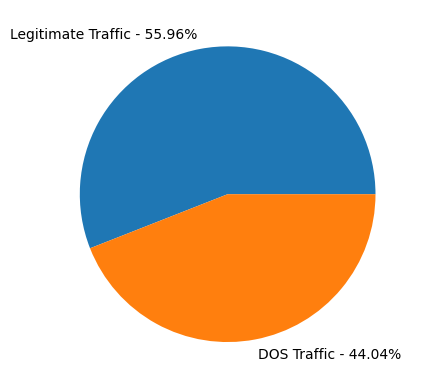

In [31]:
target_x = y.unique()
target_l = list(y)
target_y = []
for i in target_x:
    target_y.append(round(target_l.count(i)*100/len(target_l), 2))
plt.pie(target_y, labels=["Legitimate Traffic - "+str(target_y[0])+"%", "DOS Traffic - "+str(target_y[1])+"%"])
plt.show()

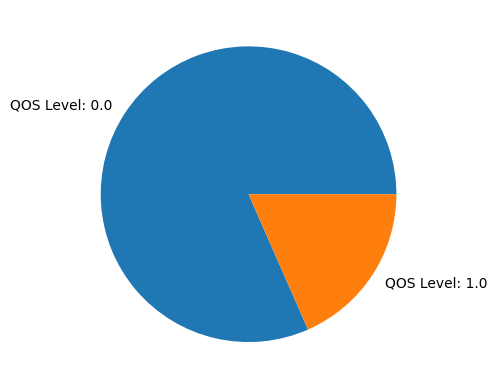

In [32]:
qos_x = x["mqtt.qos"].unique()
qos_l = list(x["mqtt.qos"])
qos_y = []
for i in qos_x:
    qos_y.append(qos_l.count(i))
plt.pie(qos_y, labels=["QOS Level: 0.0", "QOS Level: 1.0"])
plt.show()

Feature Selection

In [33]:
selector = SelectKBest(chi2, k=20)
X_reduced = selector.fit_transform(x, y)
all_features = x.columns.tolist()
select_x = [all_features[i] for i in selector.get_support(indices=True)]
select_x

['tcp.flags',
 'tcp.time_delta',
 'tcp.len',
 'mqtt.conack.flags',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.dupflag',
 'mqtt.hdrflags',
 'mqtt.kalive',
 'mqtt.len',
 'mqtt.msgid',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.qos',
 'mqtt.suback.qos',
 'mqtt.ver',
 'mqtt.willmsg',
 'mqtt.willmsg_len',
 'mqtt.willtopic',
 'mqtt.willtopic_len']

In [34]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x, y)

feature_importances = model.feature_importances_

top_k_features = np.argsort(feature_importances)[::-1][:20]

random_x = []
for i in top_k_features:
    random_x.append(x.keys()[i])
random_x = list(random_x)
random_x

['mqtt.msgid',
 'tcp.len',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.qos',
 'mqtt.msgtype',
 'tcp.time_delta',
 'tcp.flags',
 'mqtt.dupflag',
 'mqtt.conack.flags',
 'mqtt.ver',
 'mqtt.conflags',
 'mqtt.proto_len',
 'mqtt.conflag.cleansess',
 'mqtt.kalive',
 'mqtt.conflag.passwd',
 'mqtt.willmsg_len',
 'mqtt.willmsg',
 'mqtt.conack.flags.reserved',
 'mqtt.conack.flags.sp']

In [35]:
feature_names = list(set(random_x) & set(select_x))
feature_names

['mqtt.len',
 'mqtt.msgid',
 'tcp.time_delta',
 'mqtt.hdrflags',
 'mqtt.willmsg_len',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.conack.flags',
 'tcp.flags',
 'mqtt.dupflag',
 'mqtt.msgtype',
 'mqtt.kalive',
 'mqtt.ver',
 'mqtt.proto_len',
 'mqtt.qos',
 'tcp.len',
 'mqtt.willmsg']

In [36]:
features = {}
for i in feature_names:
    features[i] = x[i]
features = pd.DataFrame(features)
features

,mqtt.len,mqtt.msgid,tcp.time_delta,mqtt.hdrflags,mqtt.willmsg_len,mqtt.conflag.cleansess,mqtt.conflags,mqtt.conack.flags,tcp.flags,mqtt.dupflag,mqtt.msgtype,mqtt.kalive,mqtt.ver,mqtt.proto_len,mqtt.qos,tcp.len,mqtt.willmsg
0,0.042105,0.000000,1.664754e-02,3,0.0,0.0,0,0,4,0.0,0.214286,0.0,0.0,0.0,0.0,0.006849,0.0
1,0.889474,0.271563,1.116650e-06,4,0.0,0.0,0,0,1,0.0,0.214286,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.857895,0.154893,9.666525e-07,4,0.0,0.0,0,0,1,0.0,0.214286,0.0,0.0,0.0,1.0,1.000000,0.0
3,0.042105,0.000000,3.783278e-06,3,0.0,0.0,0,0,4,0.0,0.214286,0.0,0.0,0.0,0.0,0.006849,0.0
4,0.010526,0.280168,3.933276e-06,6,0.0,0.0,0,0,4,0.0,0.285714,0.0,0.0,0.0,0.0,0.010959,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99283,0.010526,0.725700,0.000000e+00,4,0.0,0.0,0,0,2,0.0,0.285714,0.0,0.0,0.0,0.0,0.019178,0.0
99284,0.889474,0.484400,0.000000e+00,3,0.0,0.0,0,0,2,1.0,0.214286,0.0,0.0,0.0,1.0,0.050000,0.0
99286,0.063158,0.000000,1.999981e-06,1,0.0,0.0,0,0,2,0.0,0.214286,0.0,0.0,0.0,0.0,0.009589,0.0
99288,0.000000,0.000000,4.333292e-07,0,0.0,0.0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=17)

In [38]:
model = LogisticRegression()
model.fit(x_train, y_train)

predictions_LR = model.predict(x_test)

In [64]:
print("Logistic Regression")

auc_roc = round(roc_auc_score(y_test, predictions_LR)*100, 2)
accuracy = round(accuracy_score(y_test, predictions_LR)*100, 2)
f1 = round(f1_score(y_test, predictions_LR)*100, 2)
cm = confusion_matrix(y_test, predictions_LR)

print("AUC-ROC Score: ", auc_roc, "%", sep="")
print("Accuracy Score: ", accuracy, "%", sep="")
print("F1 Score: ", f1, "%", sep="")
print("Confusion Matrix:\n", tabulate(cm, tablefmt="grid"), sep="")


Logistic Regression
AUC-ROC Score: 85.79%
Accuracy Score: 87.48%
F1 Score: 83.44%
Confusion Matrix:
+-------+-------+
| 49622 |     0 |
+-------+-------+
| 11105 | 27982 |
+-------+-------+


In [40]:
model = GaussianNB()
model.fit(x_train, y_train)

predictions_NB = model.predict(x_test)

In [66]:
print("Naive Bayes")

auc_roc = round(roc_auc_score(y_test, predictions_NB)*100, 2)
accuracy = round(accuracy_score(y_test, predictions_NB)*100, 2)
f1 = round(f1_score(y_test, predictions_NB)*100, 2)
cm = confusion_matrix(y_test, predictions_NB)

print("AUC-ROC Score: ", auc_roc, "%", sep="")
print("Accuracy Score: ", accuracy, "%", sep="")
print("F1 Score: ", f1, "%", sep="")
print("Confusion Matrix:\n", tabulate(cm, tablefmt="grid"), sep="")

Naive Bayes
AUC-ROC Score: 85.78%
Accuracy Score: 87.47%
F1 Score: 83.43%
Confusion Matrix:
+-------+-------+
| 49622 |     0 |
+-------+-------+
| 11113 | 27974 |
+-------+-------+


In [67]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

predictions_KNC = model.predict(x_test)


In [68]:
print("K-neighbours Classifier")

auc_roc = round(roc_auc_score(y_test, predictions_KNC)*100, 2)
accuracy = round(accuracy_score(y_test, predictions_KNC)*100, 2)
f1 = round(f1_score(y_test, predictions_KNC)*100, 2)
cm = confusion_matrix(y_test, predictions_KNC)

print("AUC-ROC Score: ", auc_roc, "%", sep="")
print("Accuracy Score: ", accuracy, "%", sep="")
print("F1 Score: ", f1, "%", sep="")
print("Confusion Matrix:\n", tabulate(cm, tablefmt="grid"), sep="")

K-neighbours Classifier
AUC-ROC Score: 88.73%
Accuracy Score: 88.12%
F1 Score: 87.44%
Confusion Matrix:
+-------+-------+
| 41493 |  8129 |
+-------+-------+
|  2410 | 36677 |
+-------+-------+


In [44]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

predictions_DTC = model.predict(x_test)


In [69]:
print("Decision Tree Classifier")

auc_roc = round(roc_auc_score(y_test, predictions_DTC)*100, 2)
accuracy = round(accuracy_score(y_test, predictions_DTC)*100, 2)
f1 = round(f1_score(y_test, predictions_DTC)*100, 2)
cm = confusion_matrix(y_test, predictions_DTC)

print("AUC-ROC Score: ", auc_roc, "%", sep="")
print("Accuracy Score: ", accuracy, "%", sep="")
print("F1 Score: ", f1, "%", sep="")
print("Confusion Matrix:\n", tabulate(cm, tablefmt="grid"), sep="")

Decision Tree Classifier
AUC-ROC Score: 85.99%
Accuracy Score: 87.65%
F1 Score: 83.7%
Confusion Matrix:
+-------+-------+
| 49622 |     0 |
+-------+-------+
| 10955 | 28132 |
+-------+-------+


In [46]:
model = keras.Sequential([
  keras.layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)), 
  keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

predictions_NN = model.predict(x_test)
predictions_NN = (predictions_NN > 0.5).astype(int)

c:\Users\Nivedhidha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 5s 624us/step - accuracy: 0.8500 - loss: 0.3224
Epoch 2/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 631us/step - accuracy: 0.8761 - loss: 0.2213
Epoch 3/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 608us/step - accuracy: 0.8744 - loss: 0.2216
Epoch 4/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 613us/step - accuracy: 0.8766 - loss: 0.2194
Epoch 5/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 629us/step - accuracy: 0.8755 - loss: 0.2194
Epoch 6/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 629us/step - accuracy: 0.8752 - loss: 0.2200
Epoch 7/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 624us/step - accuracy: 0.8744 - loss: 0.2207
Epoch 8/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 625us/step - accuracy: 0.8749 - loss: 0.2196
Epoch 9/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 619us/step - accuracy: 0.8741 - loss: 0.2205
Epoch 10/10
6469/6469 ━━━━━━━━━━━━━━━━━━━━ 4s 625us/step - accuracy: 0.8750 - loss: 0.2194
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 2s 557us/step


In [70]:
print("Neural Networks Classifier")

auc_roc = round(roc_auc_score(y_test, predictions_NN)*100, 2)
accuracy = round(accuracy_score(y_test, predictions_NN)*100, 2)
f1 = round(f1_score(y_test, predictions_NN)*100, 2)
cm = confusion_matrix(y_test, predictions_NN)

print("AUC-ROC Score: ", auc_roc, "%", sep="")
print("Accuracy Score: ", accuracy, "%", sep="")
print("F1 Score: ", f1, "%", sep="")
print("Confusion Matrix:\n", tabulate(cm, tablefmt="grid"), sep="")

Neural Networks Classifier
AUC-ROC Score: 85.79%
Accuracy Score: 87.48%
F1 Score: 83.44%
Confusion Matrix:
+-------+-------+
| 49622 |     0 |
+-------+-------+
| 11105 | 27982 |
+-------+-------+


In [48]:
model = SVC(kernel='linear') 
model.fit(x_train, y_train)

predictions_SVM = model.predict(x_test)

In [71]:
print("SVC Model")

auc_roc = round(roc_auc_score(y_test, predictions_SVM)*100, 2)
accuracy = round(accuracy_score(y_test, predictions_SVM)*100, 2)
f1 = round(f1_score(y_test, predictions_SVM)*100, 2)
cm = confusion_matrix(y_test, predictions_SVM)

print("AUC-ROC Score: ", auc_roc, "%", sep="")
print("Accuracy Score: ", accuracy, "%", sep="")
print("F1 Score: ", f1, "%", sep="")
print("Confusion Matrix:\n", tabulate(cm, tablefmt="grid"), sep="")

SVC Model
AUC-ROC Score: 85.79%
Accuracy Score: 87.48%
F1 Score: 83.44%
Confusion Matrix:
+-------+-------+
| 49622 |     0 |
+-------+-------+
| 11105 | 27982 |
+-------+-------+
